# Making the plot

The training was based on 20 tasks of permuted MNIST, 3000 samples for each task.
Also 20 tasks of Cifar100, 2500 samples for each task.

There are two ways to do the comparison. 

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

[tensor(0.3573), tensor(-0.2607), tensor(-0.0027)]
[tensor(0.4263), tensor(-0.3473), tensor(-0.0003)]
[tensor(0.4723), tensor(-0.1893), tensor(-0.0090)]
[tensor(0.6410), tensor(0.0167), tensor(0.0267)]
[tensor(0.5737), tensor(0.0140), tensor(-0.0043)]
[tensor(0.6610), tensor(0.0150), tensor(0.0203)]
[tensor(0.6175), tensor(0.0520), tensor(-0.0010)]


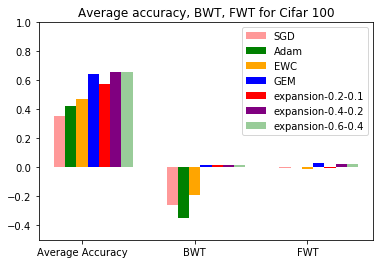

In [8]:
import matplotlib.pyplot as plt
import matplotlib


torch_file_1 = "../results/expansion_cifar100.pt_2020_11_01_17_36_23.pt"
torch_file_2 = "../results/expansion_cifar100.pt_2020_11_01_03_35_50.pt"
torch_file_3 = "../results/expansion_cifar100.pt_2020_11_01_03_44_30.pt"
torch_file_4 = "../results/gem_cifar100.pt_2020_11_01_05_09_14.pt"
torch_file_5 = "../results/ewc_cifar100.pt_2020_11_01_03_50_01.pt"
torch_file_6 = "../results/regular_cifar100.pt_2020_11_01_05_11_57.pt"
torch_file_7 = "../results/adam_cifar100.pt_2020_11_01_21_00_05.pt"



exp_0_6_0_4_data = torch.load(torch_file_1, map_location = "cpu")
exp_0_4_0_2_data = torch.load(torch_file_2, map_location = "cpu")
exp_0_2_0_1_data = torch.load(torch_file_3, map_location = "cpu")
gem_data = torch.load(torch_file_4, map_location = "cpu")
ewc_data = torch.load(torch_file_5, map_location = "cpu")
regular_data = torch.load(torch_file_6, map_location = "cpu")
adam_data = torch.load(torch_file_7, map_location = "cpu")


label_list = ['Average Accuracy', 'BWT', 'FWT'] 


x = range(len(ewc_data[4]))

print(regular_data[4])
print(adam_data[4])
print(ewc_data[4])
print(gem_data[4])
print(exp_0_2_0_1_data[4])
print(exp_0_4_0_2_data[4])
print(exp_0_6_0_4_data[4])

rects1 = plt.bar(left=x, height=regular_data[4], width=0.1, alpha=0.4, color='red', label="SGD")
rects2 = plt.bar(left=[i + 0.1 for i in x], height=adam_data[4], width=0.1, color='green', label="Adam")
rects3 = plt.bar(left=[i + 0.2 for i in x], height=ewc_data[4], width=0.1, alpha=1, color='orange', label="EWC")
rects4 = plt.bar(left=[i + 0.3 for i in x], height=gem_data[4], width=0.1, color='blue', label="GEM")
rects5 = plt.bar(left=[i + 0.4 for i in x], height=exp_0_2_0_1_data[4], width=0.1, color='red', label="expansion-0.2-0.1")
rects6 = plt.bar(left=[i + 0.5 for i in x], height=exp_0_4_0_2_data[4], width=0.1, color='purple', label="expansion-0.4-0.2")
rects7 = plt.bar(left=[i + 0.6 for i in x], height=exp_0_4_0_2_data[4], width=0.1, alpha=0.4, color='green', label="expansion-0.6-0.4")




plt.ylim([-0.5, 1.0])  
plt.ylabel("")

plt.xticks([index + 0.2 for index in x], label_list)
plt.title("Average accuracy, BWT, FWT for Cifar 100")
plt.legend()
plt.savefig("acc_fwt_bwt_cifar100.png")

tensor([2.8518e+07, 4.0939e+07, 5.5600e+07, 7.2499e+07, 9.1638e+07, 1.1302e+08])


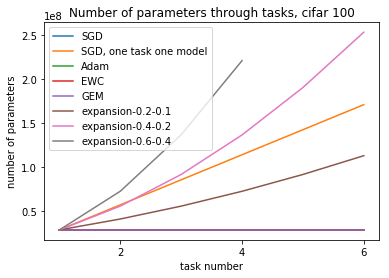

In [148]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)
x_exp_04_02 = range(1, 5)

print(exp_0_2_0_1_data[2])
plt.plot(x, regular_data[2],label="SGD")
plt.plot(x, np.multiply(regular_data[2],x),label="SGD, one task one model")
plt.plot(x, adam_data[2],label="Adam")
plt.plot(x, gem_data[2],label="EWC")
plt.plot(x, gem_data[2],label="GEM")
plt.plot(x, exp_0_2_0_1_data[2],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[2],label="expansion-0.4-0.2")
plt.plot(x_exp_04_02, exp_0_6_0_4_data[2],label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("number of parameters")
plt.xlabel("task number")
plt.title("Number of parameters through tasks, cifar 100")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("parameter_num_cifar.png")

tensor([ 30.8690,  43.3051,  64.5638,  85.2099, 120.8886, 157.1146])


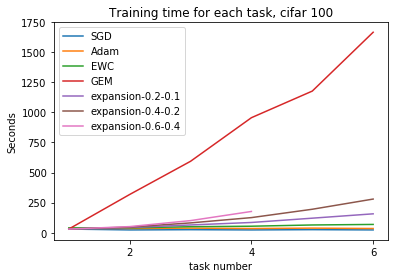

In [149]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)
x_exp_04_02 = range(1, 5)

print(exp_0_2_0_1_data[3])
plt.plot(x, regular_data[3],label="SGD")
plt.plot(x, adam_data[3],label="Adam")
plt.plot(x, ewc_data[3],label="EWC")
plt.plot(x, gem_data[3],label="GEM")
plt.plot(x, exp_0_2_0_1_data[3],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[3],label="expansion-0.4-0.2")
plt.plot(x_exp_04_02, exp_0_6_0_4_data[3],label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Seconds")
plt.xlabel("task number")
plt.title("Training time for each task, cifar 100")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("training_time_cifar.png")

tensor([ 30.8690,  43.3051,  64.5638,  85.2099, 120.8886, 157.1146])


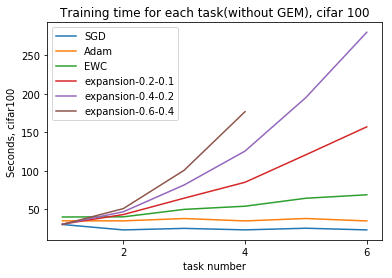

In [158]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)
x_exp_04_02 = range(1, 5)

print(exp_0_2_0_1_data[3])
plt.plot(x, regular_data[3],label="SGD")
plt.plot(x, adam_data[3],label="Adam")
plt.plot(x, ewc_data[3],label="EWC")
plt.plot(x, exp_0_2_0_1_data[3],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[3],label="expansion-0.4-0.2")
plt.plot(x_exp_04_02, exp_0_6_0_4_data[3],label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Seconds, cifar100")
plt.xlabel("task number")
plt.title("Training time for each task(without GEM), cifar 100")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("training_cifar_without_gem.png")

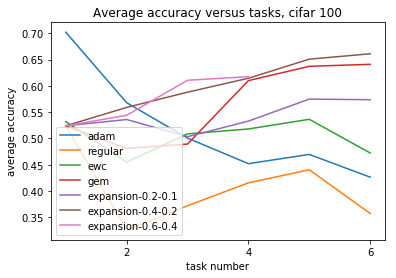

In [50]:
import numpy as np

def avg_acc_versus_task(matrix):
    avg_list = []
    for i in range(0, matrix.shape[0]):
        avg_list.append(np.mean(matrix[i,:i+1]))
    return avg_list
        


adam_confusion_matrix = np.loadtxt("../results/adam_cifar.txt", dtype='f', delimiter=' ')
adam_avg = avg_acc_versus_task(adam_confusion_matrix)
regular_confusion_matrix = np.loadtxt("../results/regular_cifar.txt", dtype='f', delimiter=' ')
regular_avg = avg_acc_versus_task(regular_confusion_matrix)
ewc_confusion_matrix = np.loadtxt("../results/ewc_cifar.txt", dtype='f', delimiter=' ')
ewc_avg = avg_acc_versus_task(ewc_confusion_matrix)
gem_confusion_matrix = np.loadtxt("../results/gem_cifar.txt", dtype='f', delimiter=' ')
gem_avg = avg_acc_versus_task(gem_confusion_matrix)
expansion_0102_confusion_matrix = np.loadtxt("../results/expansion_0102_cifar.txt", dtype='f', delimiter=' ')
expansion_0102_avg = avg_acc_versus_task(expansion_0102_confusion_matrix)
expansion_0204_confusion_matrix = np.loadtxt("../results/expansion_0204_cifar.txt", dtype='f', delimiter=' ')
expansion_0204_avg = avg_acc_versus_task(expansion_0204_confusion_matrix)
expansion_0406_confusion_matrix = np.loadtxt("../results/expansion_0406_cifar.txt", dtype='f', delimiter=' ')
expansion_0406_avg = avg_acc_versus_task(expansion_0406_confusion_matrix)

x = range(len(adam_avg))
x = np.add(x,1)
x_exp_0406 = range(1,len(expansion_0406_avg)+1)
plt.plot(x, adam_avg, label="adam")
plt.plot(x, regular_avg, label="regular")
plt.plot(x, ewc_avg, label="ewc")
plt.plot(x, gem_avg, label="gem")
plt.plot(x, expansion_0102_avg, label="expansion-0.2-0.1")
plt.plot(x, expansion_0204_avg, label="expansion-0.4-0.2")
plt.plot(x_exp_0406, expansion_0406_avg, label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("average accuracy")
plt.xlabel("task number")
plt.title("Average accuracy versus tasks, cifar 100")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("cifar100_avg_versus_tasks.png")


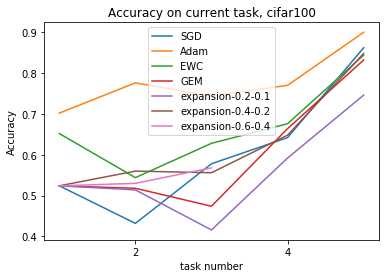

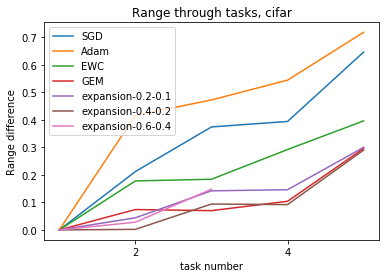

In [61]:
torch_file_1 = "../results/expansion_cifar100.pt_2020_11_01_17_36_23.pt"
torch_file_2 = "../results/expansion_cifar100.pt_2020_11_01_03_35_50.pt"
torch_file_3 = "../results/expansion_cifar100.pt_2020_11_01_03_44_30.pt"
torch_file_4 = "../results/gem_cifar100.pt_2020_11_01_05_09_14.pt"
torch_file_5 = "../results/ewc_cifar100.pt_2020_11_01_03_50_01.pt"
torch_file_6 = "../results/regular_cifar100.pt_2020_11_01_05_11_57.pt"
torch_file_7 = "../results/adam_cifar100.pt_2020_11_01_21_00_05.pt"


exp_0_6_0_4_data = torch.load(torch_file_1, map_location = "cpu")
exp_0_4_0_2_data = torch.load(torch_file_2, map_location = "cpu")
exp_0_2_0_1_data = torch.load(torch_file_3, map_location = "cpu")
gem_data = torch.load(torch_file_4, map_location = "cpu")
ewc_data = torch.load(torch_file_5, map_location = "cpu")
regular_data = torch.load(torch_file_6, map_location = "cpu")
adam_data = torch.load(torch_file_7, map_location = "cpu")


label_list = ['Average Accuracy', 'FWT', 'BWT'] 

x = range(len(ewc_data[4]))

def task_changes(result_t):
    n_tasks = int(result_t.max() + 1)
    changes = []
    current = result_t[0]
    for i, t in enumerate(result_t):
        if t != current:
            changes.append(i)
            current = t

    return n_tasks, changes


def get_current(data):
    result_t = data[0]
    result_a = data[1]
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    confusion_matrix = result_a.index_select(0, torch.LongTensor(changes))  # .index (torch<0.3.1) | .index_select (torch>0.4)
    result = []
    for i in range(0, confusion_matrix.shape[0]-1):
        result.append(confusion_matrix[i][i])
    return result
        
def get_range(data):
    result_t = data[0]
    result_a = data[1]
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    confusion_matrix = result_a.index_select(0, torch.LongTensor(changes))  # .index (torch<0.3.1) | .index_select (torch>0.4)
    result = []
    
    for i in range(0, confusion_matrix.shape[0]-1):
        tasks = confusion_matrix[i,:]
        tasks = tasks.numpy()
        tasks = tasks[0:i+1]
        ran = max(tasks)-min(tasks)
        result.append(ran)
    return result

regular_current = get_current(regular_data)
adam_current = get_current(adam_data)
gem_current = get_current(gem_data)
ewc_current = get_current(ewc_data)
exp_0_2_0_1_current = get_current(exp_0_2_0_1_data)
exp_0_4_0_2_current = get_current(exp_0_4_0_2_data)
exp_0_6_0_4_current = get_current(exp_0_6_0_4_data)


x = range(1,len(ewc_current)+1)
x_exp_0_6_0_4 = range(1,len(exp_0_6_0_4_current)+1)

plt.plot(x, regular_current,label="SGD")
plt.plot(x, adam_current,label="Adam")
plt.plot(x, ewc_current,label="EWC")
plt.plot(x, gem_current,label="GEM")
plt.plot(x, exp_0_2_0_1_current,label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_current,label="expansion-0.4-0.2")
plt.plot(x_exp_0_6_0_4, exp_0_6_0_4_current,label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("task number")
plt.title("Accuracy on current task, cifar100")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("accuracy_current_cifar.png")


regular_range = get_range(regular_data)
adam_range = get_range(adam_data)
gem_range = get_range(gem_data)
ewc_range = get_range(ewc_data)
exp_0_2_0_1_range = get_range(exp_0_2_0_1_data)
exp_0_4_0_2_range = get_range(exp_0_4_0_2_data)
exp_0_6_0_4_range = get_range(exp_0_6_0_4_data)
                      
x = range(1,len(regular_range)+1)

plt.figure()
plt.plot(x, regular_range,label="SGD")
plt.plot(x, adam_range,label="Adam")
plt.plot(x, ewc_range,label="EWC")
plt.plot(x, gem_range,label="GEM")
plt.plot(x, exp_0_2_0_1_range,label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_range,label="expansion-0.4-0.2")
plt.plot(range(1, len(exp_0_6_0_4_range)+1), exp_0_6_0_4_range,label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Range difference")
plt.xlabel("task number")
plt.title("Range through tasks, cifar")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("range_cifar.png")

In [106]:
print(ewc_data[3])

tensor([40.1575, 40.3433, 50.0306, 54.1474, 64.4744, 68.9576])


[tensor(0.4134), tensor(-0.4889), tensor(0.0174)]
[tensor(0.5433), tensor(-0.3580), tensor(0.0130)]
[tensor(0.5447), tensor(-0.3439), tensor(0.0178)]
[tensor(0.8382), tensor(-0.0593), tensor(0.0063)]
[tensor(0.8680), tensor(0.), tensor(0.0199)]
[tensor(0.8794), tensor(0.), tensor(0.0196)]
[tensor(0.8866), tensor(0.), tensor(0.0162)]


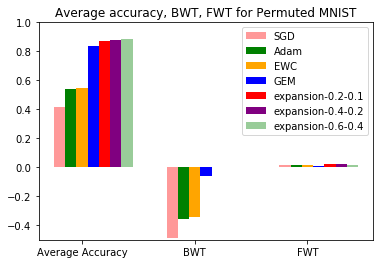

In [9]:
torch_file_1 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_26_05.pt"
torch_file_2 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_39_35.pt"
torch_file_3 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_52_41.pt"
torch_file_4 = "../results/gem_mnist_permutations_20.pt_2020_11_01_07_04_07.pt"
torch_file_5 = "../results/ewc_mnist_permutations_20.pt_2020_11_01_22_25_42.pt"
torch_file_6 = "../results/regular_mnist_permutations_20.pt_2020_11_01_07_46_47.pt"
torch_file_7 = "../results/adam_mnist_permutations_20.pt_2020_11_01_21_14_08.pt"



exp_0_6_0_4_data = torch.load(torch_file_1, map_location = "cpu")
exp_0_4_0_2_data = torch.load(torch_file_2, map_location = "cpu")
exp_0_2_0_1_data = torch.load(torch_file_3, map_location = "cpu")
gem_data = torch.load(torch_file_4, map_location = "cpu")
ewc_data = torch.load(torch_file_5, map_location = "cpu")
regular_data = torch.load(torch_file_6, map_location = "cpu")
adam_data = torch.load(torch_file_7, map_location = "cpu")


label_list = ['Average Accuracy', 'BWT', 'FWT'] 

x = range(len(ewc_data[4]))


print(regular_data[4])
print(adam_data[4])
print(ewc_data[4])
print(gem_data[4])
print(exp_0_2_0_1_data[4])
print(exp_0_4_0_2_data[4])
print(exp_0_6_0_4_data[4])

rects1 = plt.bar(left=x, height=regular_data[4], width=0.1, alpha=0.4, color='red', label="SGD")
rects2 = plt.bar(left=[i + 0.1 for i in x], height=adam_data[4], width=0.1, color='green', label="Adam")
rects3 = plt.bar(left=[i + 0.2 for i in x], height=ewc_data[4], width=0.1, alpha=1, color='orange', label="EWC")
rects4 = plt.bar(left=[i + 0.3 for i in x], height=gem_data[4], width=0.1, color='blue', label="GEM")
rects5 = plt.bar(left=[i + 0.4 for i in x], height=exp_0_2_0_1_data[4], width=0.1, color='red', label="expansion-0.2-0.1")
rects6 = plt.bar(left=[i + 0.5 for i in x], height=exp_0_4_0_2_data[4], width=0.1, color='purple', label="expansion-0.4-0.2")
rects7 = plt.bar(left=[i + 0.6 for i in x], height=exp_0_6_0_4_data[4], width=0.1, alpha=0.4,color='green', label="expansion-0.6-0.4")


plt.ylim([-0.5, 1.0])  
plt.ylabel("")

plt.xticks([index + 0.2 for index in x], label_list)
plt.title("Average accuracy, BWT, FWT for Permuted MNIST")
plt.legend()
plt.savefig("acc_fwt_bwt_permuted_mnist.png")

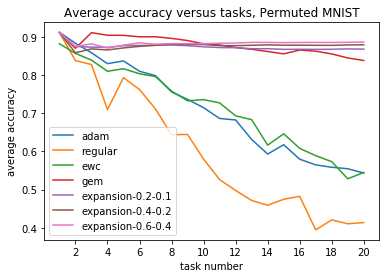

In [42]:
import numpy as np

def avg_acc_versus_task(matrix):
    avg_list = []
    for i in range(0, matrix.shape[0]):
        avg_list.append(np.mean(matrix[i,:i+1]))
    return avg_list
        


adam_confusion_matrix = np.loadtxt("../results/adam_pmnist.txt", dtype='f', delimiter=' ')
adam_avg = avg_acc_versus_task(adam_confusion_matrix)
regular_confusion_matrix = np.loadtxt("../results/regular_pmnist.txt", dtype='f', delimiter=' ')
regular_avg = avg_acc_versus_task(regular_confusion_matrix)
ewc_confusion_matrix = np.loadtxt("../results/ewc_pmnist.txt", dtype='f', delimiter=' ')
ewc_avg = avg_acc_versus_task(ewc_confusion_matrix)
gem_confusion_matrix = np.loadtxt("../results/gem_pmnist.txt", dtype='f', delimiter=' ')
gem_avg = avg_acc_versus_task(gem_confusion_matrix)
expansion_0102_confusion_matrix = np.loadtxt("../results/expansion_0102_pmnist.txt", dtype='f', delimiter=' ')
expansion_0102_avg = avg_acc_versus_task(expansion_0102_confusion_matrix)
expansion_0204_confusion_matrix = np.loadtxt("../results/expansion_0204_pmnist.txt", dtype='f', delimiter=' ')
expansion_0204_avg = avg_acc_versus_task(expansion_0204_confusion_matrix)
expansion_0406_confusion_matrix = np.loadtxt("../results/expansion_0406_pmnist.txt", dtype='f', delimiter=' ')
expansion_0406_avg = avg_acc_versus_task(expansion_0406_confusion_matrix)

x = range(len(adam_avg))
x = np.add(x,1)
plt.plot(x, adam_avg, label="adam")
plt.plot(x, regular_avg, label="regular")
plt.plot(x, ewc_avg, label="ewc")
plt.plot(x, gem_avg, label="gem")
plt.plot(x, expansion_0102_avg, label="expansion-0.2-0.1")
plt.plot(x, expansion_0204_avg, label="expansion-0.4-0.2")
plt.plot(x, expansion_0406_avg, label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("average accuracy")
plt.xlabel("task number")
plt.title("Average accuracy versus tasks, Permuted MNIST")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("pmnist_avg_versus_tasks.png")


tensor([ 89610., 108620., 120390., 140300., 160610., 173780., 194990., 209060.,
        223530., 238400., 253670., 269340., 285410., 301880., 318750., 344360.,
        362130., 380300., 407310.])


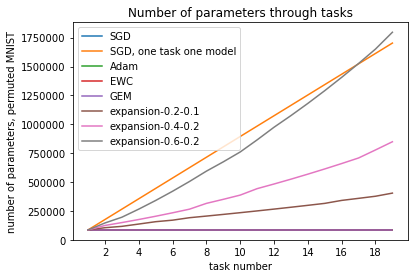

In [53]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)

print(exp_0_2_0_1_data[2])
plt.plot(x, regular_data[2],label="SGD")
plt.plot(x, np.multiply(regular_data[2],x),label="SGD, one task one model")
plt.plot(x, adam_data[2],label="Adam")
plt.plot(x, ewc_data[2],label="EWC")
plt.plot(x, gem_data[2],label="GEM")
plt.plot(x, exp_0_2_0_1_data[2],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[2],label="expansion-0.4-0.2")
plt.plot(x, exp_0_6_0_4_data[2],label="expansion-0.6-0.2")
plt.legend()
plt.ylabel("number of parameters, permuted MNIST")
plt.xlabel("task number")
plt.title("Number of parameters through tasks")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("parameter_num_permuted_mnist.png")

tensor([24.7542, 30.4355, 31.4507, 32.1966, 33.1799, 34.1300, 35.1496, 36.4609,
        36.4200, 37.2289, 38.4121, 44.7249, 40.3586, 42.1291, 43.1861, 47.6471,
        45.2050, 45.9077, 48.0797])


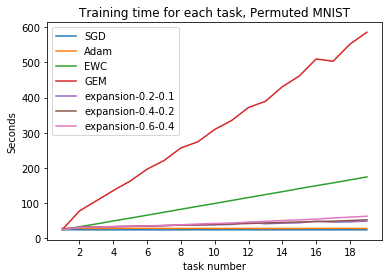

In [54]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)

print(exp_0_2_0_1_data[3])
plt.plot(x, regular_data[3],label="SGD")
plt.plot(x, adam_data[3],label="Adam")
plt.plot(x, ewc_data[3],label="EWC")
plt.plot(x, gem_data[3],label="GEM")
plt.plot(x, exp_0_2_0_1_data[3],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[3],label="expansion-0.4-0.2")
plt.plot(x, exp_0_6_0_4_data[3],label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Seconds")
plt.xlabel("task number")
plt.title("Training time for each task, Permuted MNIST")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("training_time_permuted_mnist.png")

tensor([24.7542, 30.4355, 31.4507, 32.1966, 33.1799, 34.1300, 35.1496, 36.4609,
        36.4200, 37.2289, 38.4121, 44.7249, 40.3586, 42.1291, 43.1861, 47.6471,
        45.2050, 45.9077, 48.0797])


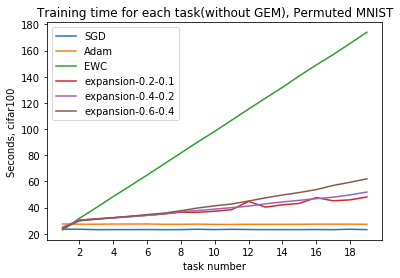

In [55]:
import matplotlib.ticker as mticker

x = range(len(ewc_data[2]))
x = np.add(x,1)

print(exp_0_2_0_1_data[3])
plt.plot(x, regular_data[3],label="SGD")
plt.plot(x, adam_data[3],label="Adam")
plt.plot(x, ewc_data[3],label="EWC")
plt.plot(x, exp_0_2_0_1_data[3],label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_data[3],label="expansion-0.4-0.2")
plt.plot(x, exp_0_6_0_4_data[3],label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Seconds, cifar100")
plt.xlabel("task number")
plt.title("Training time for each task(without GEM), Permuted MNIST")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("training_time_permuted_mnist_without_gem.png")

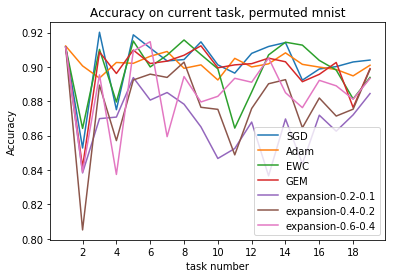

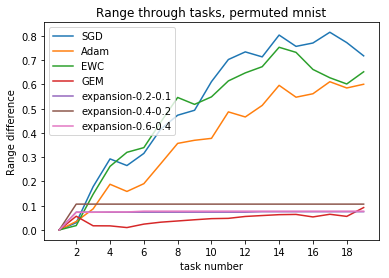

In [56]:
torch_file_1 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_26_05.pt"
torch_file_2 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_39_35.pt"
torch_file_3 = "../results/expansion_mnist_permutations_20.pt_2020_10_31_23_52_41.pt"
torch_file_4 = "../results/gem_mnist_permutations_20.pt_2020_11_01_07_04_07.pt"
torch_file_5 = "../results/ewc_mnist_permutations_20.pt_2020_11_01_07_38_52.pt"
torch_file_6 = "../results/regular_mnist_permutations_20.pt_2020_11_01_07_46_47.pt"
torch_file_7 = "../results/adam_mnist_permutations_20.pt_2020_11_01_21_14_08.pt"



exp_0_6_0_4_data = torch.load(torch_file_1, map_location = "cpu")
exp_0_4_0_2_data = torch.load(torch_file_2, map_location = "cpu")
exp_0_2_0_1_data = torch.load(torch_file_3, map_location = "cpu")
gem_data = torch.load(torch_file_4, map_location = "cpu")
ewc_data = torch.load(torch_file_5, map_location = "cpu")
regular_data = torch.load(torch_file_6, map_location = "cpu")
adam_data = torch.load(torch_file_7, map_location = "cpu")


label_list = ['Average Accuracy', 'FWT', 'BWT'] 

x = range(len(ewc_data[4]))

def task_changes(result_t):
    n_tasks = int(result_t.max() + 1)
    changes = []
    current = result_t[0]
    for i, t in enumerate(result_t):
        if t != current:
            changes.append(i)
            current = t

    return n_tasks, changes


def get_current(data):
    result_t = data[0]
    result_a = data[1]
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    confusion_matrix = result_a.index_select(0, torch.LongTensor(changes))  # .index (torch<0.3.1) | .index_select (torch>0.4)
    result = []
    for i in range(0, confusion_matrix.shape[0]-1):
        result.append(confusion_matrix[i][i])
    return result

def get_range(data):
    result_t = data[0]
    result_a = data[1]
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    confusion_matrix = result_a.index_select(0, torch.LongTensor(changes))  # .index (torch<0.3.1) | .index_select (torch>0.4)
    result = []
    
    for i in range(0, confusion_matrix.shape[0]-1):
        tasks = confusion_matrix[i,:]
        tasks = tasks.numpy()
        tasks = tasks[0:i+1]
        ran = max(tasks)-min(tasks)
        result.append(ran)
    return result
        
regular_current = get_current(regular_data)
adam_current = get_current(adam_data)
gem_current = get_current(gem_data)
ewc_current = get_current(ewc_data)
exp_0_2_0_1_current = get_current(exp_0_2_0_1_data)
exp_0_4_0_2_current = get_current(exp_0_4_0_2_data)
exp_0_6_0_4_current = get_current(exp_0_6_0_4_data)


x = range(1,len(ewc_data[2])+1)
plt.figure()
plt.plot(x, regular_current,label="SGD")
plt.plot(x, adam_current,label="Adam")
plt.plot(x, ewc_current,label="EWC")
plt.plot(x, gem_current,label="GEM")
plt.plot(x, exp_0_2_0_1_current,label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_current,label="expansion-0.4-0.2")
plt.plot(x, exp_0_6_0_4_current,label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("task number")
plt.title("Accuracy on current task, permuted mnist")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("accuracy_current_permuted_mnist.png")
                      
regular_range = get_range(regular_data)
adam_range = get_range(adam_data)
gem_range = get_range(gem_data)
ewc_range = get_range(ewc_data)
exp_0_2_0_1_range = get_range(exp_0_2_0_1_data)
exp_0_4_0_2_range = get_range(exp_0_4_0_2_data)
exp_0_6_0_4_range = get_range(exp_0_6_0_4_data)
                      
x = range(1,len(ewc_data[2])+1)

plt.figure()
plt.plot(x, regular_range,label="SGD")
plt.plot(x, adam_range,label="Adam")
plt.plot(x, ewc_range,label="EWC")
plt.plot(x, gem_range,label="GEM")
plt.plot(x, exp_0_2_0_1_range,label="expansion-0.2-0.1")
plt.plot(x, exp_0_4_0_2_range,label="expansion-0.4-0.2")
plt.plot(x, exp_0_6_0_4_range,label="expansion-0.6-0.4")
plt.legend()
plt.ylabel("Range difference")
plt.xlabel("task number")
plt.title("Range through tasks, permuted mnist")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.savefig("range_permuted_mnist.png")
